In [ ]:
# %load poi_id.py
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

In [1]:
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

**Task 1: Select Features**

The variable, features_list, is a list of strings, each of which is a feature name.

The first feature must be the dependent, or target, variable, "poi".

The first question that arises for me is where can I see a list of available features? How do I decide what features I want before I have seen the features? 

Anyway, here is one that seems good enough to start with. 

In [2]:
features_list = ['poi','salary','bonus','total_stock_value','long_term_incentive','from_this_person_to_poi','shared_receipt_with_poi' ]

Load the dictionary containing the dataset

In [3]:
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

**Task 2: Eliminate Outliers**
  
No further dicretion is supplied for this task. It seems that I have to fit the model and test it before it makes sense to even decide what an outlier is, no? 

No, I have to look at the data and do exploratory data analysis. 

Now the data is in dictionary form: 

In [4]:
type(data_dict)

dict

In [5]:
data_dict.keys()[:10]

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P',
 'MORDAUNT KRISTINA M',
 'MEYER ROCKFORD G',
 'MCMAHON JEFFREY',
 'HORTON STANLEY C',
 'PIPER GREGORY F']

Now, I don't know what they did in the course off hand, but I think this sort of thing is easiest done in pandas. I think I will import pandas, make a copy of the data, change it into a DataFrame, then change the DataFrame back into a dictionary. 

In [12]:
import pandas as pd
import numpy as np

In [13]:
data_dict_test = data_dict
df = pd.DataFrame(data_dict_test)
df.head()

,ALLEN PHILLIP K,BADUM JAMES P,BANNANTINE JAMES M,BAXTER JOHN C,BAY FRANKLIN R,BAZELIDES PHILIP J,BECK SALLY W,BELDEN TIMOTHY N,BELFER ROBERT,BERBERIAN DAVID,...,WASAFF GEORGE,WESTFAHL RICHARD K,WHALEY DAVID A,WHALLEY LAWRENCE G,WHITE JR THOMAS E,WINOKUR JR. HERBERT S,WODRASKA JOHN,WROBEL BRUCE,YEAGER F SCOTT,YEAP SOON
bonus,4175000,NaN,NaN,1200000,400000,NaN,700000,5249999,NaN,NaN,...,325000,NaN,NaN,3000000,450000,NaN,NaN,NaN,NaN,NaN
deferral_payments,2869717,178980,NaN,1295738,260455,684694,NaN,2144013,-102500,NaN,...,831299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deferred_income,-3081055,NaN,-5104,-1386055,-201641,NaN,NaN,-2334434,NaN,NaN,...,-583325,-10800,NaN,NaN,NaN,-25000,NaN,NaN,NaN,NaN
director_fees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3285,NaN,...,NaN,NaN,NaN,NaN,NaN,108579,NaN,NaN,NaN,NaN
email_address,phillip.allen@enron.com,NaN,james.bannantine@enron.com,NaN,frank.bay@enron.com,NaN,sally.beck@enron.com,tim.belden@enron.com,NaN,david.berberian@enron.com,...,george.wasaff@enron.com,dick.westfahl@enron.com,NaN,greg.whalley@enron.com,thomas.white@enron.com,NaN,john.wodraska@enron.com,NaN,scott.yeager@enron.com,NaN


In [14]:
df = df.transpose()

In [15]:
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [39]:
type(df['bonus'])

pandas.core.series.Series

In [40]:
df['bonus'] = df['bonus'].astype(float)

In [41]:
type(df['bonus'])

pandas.core.series.Series

In [42]:
df['bonus'].mean()

2374234.6097560977

In [48]:
df['bonus'].plot(kind='hist')

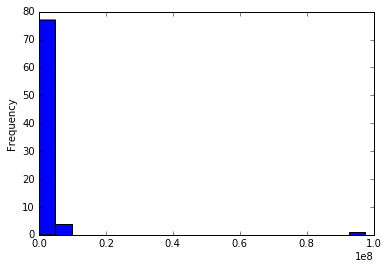

In [54]:
%matplotlib inline
df['bonus'].plot(kind='hist', bins=20)

Well, I seem to have at least one outlier. 

In [56]:
df['bonus'].max()

97343619.0

So if someone got a 97 million dollar bonus he has probably already attracted the attention of the investigators. Now, how to access the person that got the bonus, in a pandas-like way? 

In [61]:
df[df['bonus']==97343619.0]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619,32083396,-27992891,1398517,NaN,311764000,5235198,NaN,NaN,NaN,...,48521928,42667589,False,130322299,-7576788,26704229,NaN,NaN,309886585,434509511


Ok, so we are getting the total mixed in with all the other values. That is the first one to eliminate. 

In [63]:
df.index == 'TOTAL'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Maybe total is at the end of the data set? 

In [65]:
df.tail()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
WINOKUR JR. HERBERT S,NaN,NaN,-25000,108579,NaN,NaN,1413,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,84992,NaN
WODRASKA JOHN,NaN,NaN,NaN,NaN,john.wodraska@enron.com,NaN,NaN,NaN,NaN,NaN,...,NaN,189583,False,NaN,NaN,NaN,NaN,NaN,189583,NaN
WROBEL BRUCE,NaN,NaN,NaN,NaN,NaN,139130,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,139130
YEAGER F SCOTT,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552,53947,NaN,NaN,NaN,...,NaN,147950,True,3576206,NaN,158403,NaN,NaN,360300,11884758
YEAP SOON,NaN,NaN,NaN,NaN,NaN,192758,55097,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,55097,192758


So, no, it isn't. Where else might it be? Well, it is probably listed as a name. So, how do we retreive people by name? 

I know how to call the columns with names, but I don't know how to call the columns without names. I thought they were the index? Try a few things, then to the internet!

In [67]:
df[df.index=='TOTAL']

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619,32083396,-27992891,1398517,NaN,311764000,5235198,NaN,NaN,NaN,...,48521928,42667589,False,130322299,-7576788,26704229,NaN,NaN,309886585,434509511


Well, that is what would work. Now, how do we remove a row? That I will look up! 

Here is an example bit of code from stackoverflow: 
```
df.drop(df.index[[1,3]])
```
So index works for the string I used above so that combined with drop should work. 

In [68]:
len(df)

146

In [70]:
df_test = df

In [83]:
df_test = df_test.drop('TOTAL')

In [84]:
len(df_test)

145

Ok, so that seems to have worked. Lets test it out.

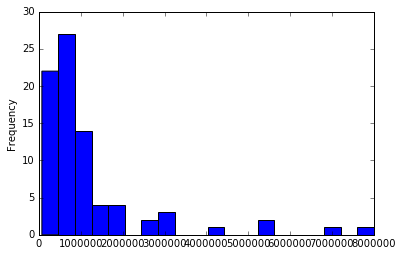

In [87]:
df_test['bonus'].plot(kind='hist', bins=20)

In [88]:
df_test['bonus'].max()

8000000.0

So now the highest bonus is a much more 'reasonable' 8 million. 

Now I have to finish cleaning up the data set. There are three things I need to do: 

* convert df to the now repaired df_test
* change or otherwise deal with the NaN values
* convert the strings to numbers where appropriate

In [89]:
df = df_test

In [90]:
len(df)

145

**Task 3: Create new feature(s)**

I get lots of ideas for these usually but nothing has occurred to me so far with this data set. 

There may be a interesting effect of persons that don't take a big salary but are compensated in other ways like stock options or high stock values. Maybe a feature like the difference between salary and other forms of compensation? 

In [6]:
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [8]:
labels[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]

**Task 4: Try a varity of classifiers**
Please name your classifier *clf* for easy export below.
Note that if you want to do PCA or other multi-stage operations,
you'll need to use Pipelines. For more info: [pipeline](http://scikit-learn.org/stable/modules/pipeline.html)

The first one is provided by the courseware to provide a starting point, but we should try others. 

In [10]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

**Task 5: Tune to >= 0.3 precision and recall** 

Use the course testing script. Check the tester.py script in the final project folder for details on the evaluation method, especially the test_classifier function. Because of the small size of the dataset, the script uses stratified shuffle split cross validation. For more info: [cross_validation](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html)

The next cell is an example starting point. Try investigating other evaluation techniques!

In [11]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

**Task 6: Dump**
    
Dump the classifier, dataset, and features_list so anyone can check your results. 

You do not need to change anything below, but make sure that the version of poi_id.py that you submit can be run on its own and generates the necessary .pkl files for validating your results.

In [12]:
dump_classifier_and_data(clf, my_dataset, features_list)